The data has several columns, including:

- `RespondentID` - An anonymized ID for the respondent (person taking the survey)
- `Gender` - The respondent's gender
- `Age` - The respondent's age
- `Household Income` - The respondent's income
- `Education` - The respondent's education level
- `Location (Census Region)` - The respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` - Has a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a Yes or No response

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [2]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [3]:
print(star_wars['RespondentID'].isnull().sum())

0


In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].isnull().sum()

0

In [5]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].isnull().sum()

350

In [6]:
# convert columns to boolean type
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map({'Yes': True, 'No': False})
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map({'Yes': True, 'No': False})

1        True
2         NaN
3       False
4        True
5        True
        ...  
1182     True
1183     True
1184      NaN
1185     True
1186    False
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, Length: 1186, dtype: object

In [7]:
# create a list of episodes

episodes = []

for c in star_wars.columns[3:9]:
    episodes.append(star_wars[c].value_counts().index.tolist()[0])
    
print(episodes)

['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones', 'Star Wars: Episode III  Revenge of the Sith', 'Star Wars: Episode IV  A New Hope', 'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the Jedi']


In [8]:
# list of columns to convert

star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [9]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [10]:
n=0
for c in star_wars.columns[3:9]:
        star_wars[c] = star_wars[c].map({episodes[n]: True, np.NaN: False})
        n+=1

In [11]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [12]:
# create a list with new column names

r = re.compile('.+(Episode\s\w+)')
names = [x[0] for x in list(map(r.findall, episodes))]

print(names)

['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']


In [13]:
# create a list of old column names
old_names = star_wars.columns[3:9].to_list()
print(old_names)

['Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']


In [14]:
# rename columns
for n in range(6):
    star_wars = star_wars.rename(columns = {old_names[n]: names[n]})

In [15]:
# convert rate columns to numeric
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [16]:
# create a list of old column names
old_names = star_wars.columns[9:15].to_list()
print(old_names)

['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']


In [17]:
# rename columns
for n in range(6):
    star_wars = star_wars.rename(columns = {old_names[n]: '{} rating'.format(names[n])})

In [18]:
# calculate average ratings
means = star_wars[star_wars.columns[9:15]].mean(axis=0)
means.sort_values()

Episode V rating      2.513158
Episode VI rating     3.047847
Episode IV rating     3.272727
Episode I rating      3.732934
Episode II rating     4.087321
Episode III rating    4.341317
dtype: float64

<AxesSubplot:title={'center':'Average ratings'}>

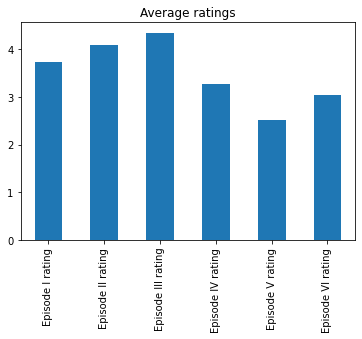

In [19]:
# plot average ratings 

means.plot(kind = 'bar', title = 'Average ratings')

Average ratings given by respondents showed that the most popular film in 'Star Wars' serie is **'Star Wars: Episode V The Empire Strikes Back'**, followed by 'Star Wars: Episode VI Return of the Jedi' and 'Star Wars: Episode IV  A New Hope'. 
That means the audience tends to prefer older films. 

In [20]:
# calculate total number of viewers
sums = star_wars[star_wars.columns[3:9]].sum(axis=0)
sums.sort_values(ascending=False)

Episode V      758
Episode VI     738
Episode I      673
Episode IV     607
Episode II     571
Episode III    550
dtype: int64

<AxesSubplot:title={'center':'Number of viewers'}>

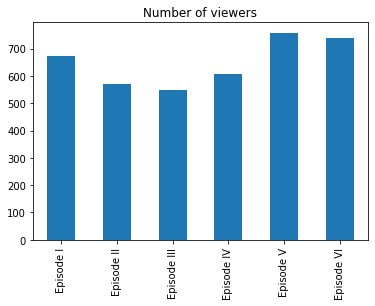

In [21]:
# plot number of viewers

sums.plot(kind='bar', title= 'Number of viewers')

Most viewed are also films that got highest rankings from the respondents: 'Star Wars: Episode V The Empire Strikes Back' and 'Star Wars: Episode VI Return of the Jedi'. There is a clear trend in preference of older films. They formed the narrative of the saga and certainly regarded as 'classics'.

In [22]:
# calculate gender-specific values
gender_diff = star_wars.groupby(['Gender']).mean()
print(gender_diff.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Female to Male
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RespondentID        2 non-null      float64
 1   Episode I           2 non-null      float64
 2   Episode II          2 non-null      float64
 3   Episode III         2 non-null      float64
 4   Episode IV          2 non-null      float64
 5   Episode V           2 non-null      float64
 6   Episode VI          2 non-null      float64
 7   Episode I rating    2 non-null      float64
 8   Episode II rating   2 non-null      float64
 9   Episode III rating  2 non-null      float64
 10  Episode IV rating   2 non-null      float64
 11  Episode V rating    2 non-null      float64
 12  Episode VI rating   2 non-null      float64
dtypes: float64(13)
memory usage: 224.0+ bytes
None


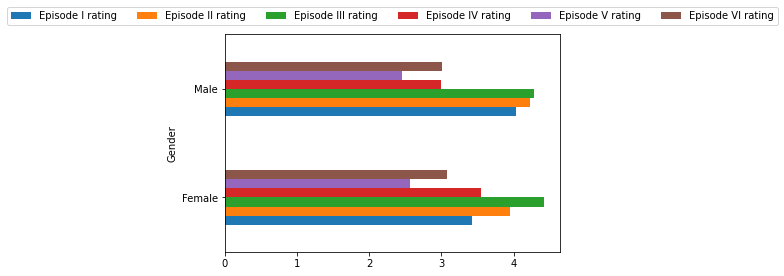

In [23]:
# plot gender-specific average rankings
avg_rat = gender_diff[gender_diff.columns[7:]].plot.barh()
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=6)


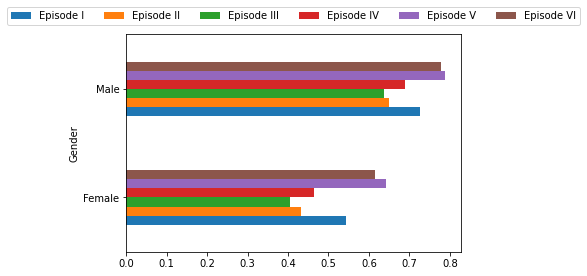

In [25]:
# plot gender-specific number of views
avg_view = gender_diff[gender_diff.columns[1:7]].plot.barh()
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=6)

Examination of ratings for two gender groups shows that for both groups top films are Episodes V and VI, Episode IV (the first of the franchise to be produced) is ranked lower by females. Two latest episodes have higher rankings in female group.
Regarding the number of viewers the majority of respondents were male, top rated Episodes got most views in both groups.

<AxesSubplot:>

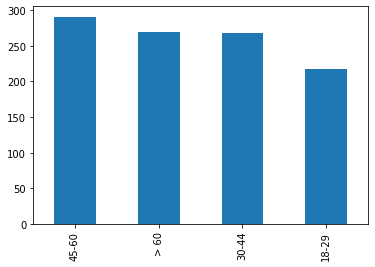

In [33]:
star_wars['Age'].value_counts().plot.bar()

In [37]:
# calculate average ratings by age groups
age_diff = star_wars.groupby(['Age']).mean()
ages = age_diff.index.to_list()
print(age_diff)
print(ages)

       RespondentID  Episode I  Episode II  Episode III  Episode IV  \
Age                                                                   
18-29  3.290464e+09   0.733945    0.678899     0.665138    0.697248   
30-44  3.290218e+09   0.652985    0.589552     0.567164    0.656716   
45-60  3.289923e+09   0.621993    0.508591     0.487973    0.567010   
> 60   3.290001e+09   0.531599    0.394052     0.371747    0.386617   

       Episode V  Episode VI  Episode I rating  Episode II rating  \
Age                                                                 
18-29   0.733945    0.733945          4.100000           4.100000   
30-44   0.735075    0.735075          4.347826           4.309179   
45-60   0.756014    0.721649          3.541667           4.170833   
> 60    0.624535    0.587361          3.010417           3.761658   

       Episode III rating  Episode IV rating  Episode V rating  \
Age                                                              
18-29            3.966667 

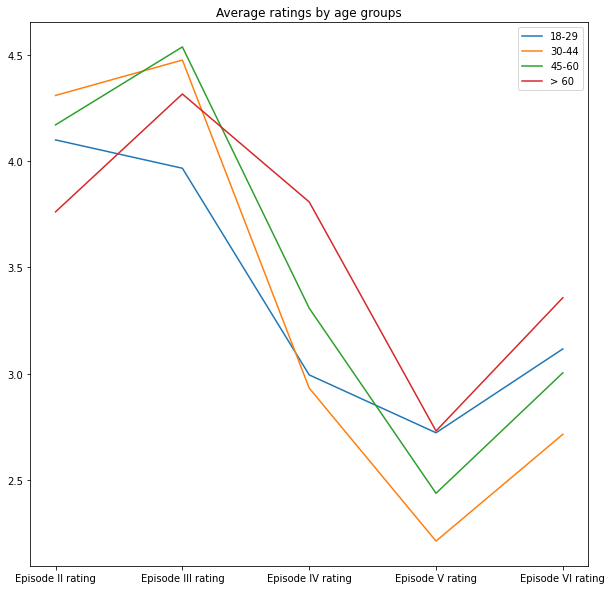

In [60]:
# plot line chart
fig, ax = plt.subplots(figsize=(10, 10))
for a in ages:
    ax.plot(age_diff.loc[a, age_diff.columns[8:]])
    ax.set_title('Average ratings by age groups')
    ax.legend(ages)
plt.show()

The overall trend in ratings looks similar for all age groups: the highest rating got Episode V, and 3 'classic' episodes have in 3 age groups top-3 ratings.

There are though some differences: 
- respondents from the youngest age group (18-29 years) showed preference to the Episode IV among 'classic' episodes -- respondents from the oldest age group (>60 years) gave higher rating to the latest film, Episode II.

In [62]:
# calculate average ratings by education
edu_diff = star_wars.groupby(['Education']).mean()
edus = edu_diff.index.to_list()
print(edu_diff)
print(edus)

                                  RespondentID  Episode I  Episode II  \
Education                                                               
Bachelor degree                   3.290151e+09   0.641745    0.529595   
Graduate degree                   3.289917e+09   0.650909    0.541818   
High school degree                3.290433e+09   0.542857    0.457143   
Less than high school degree      3.289831e+09   0.428571    0.428571   
Some college or Associate degree  3.290179e+09   0.643293    0.567073   

                                  Episode III  Episode IV  Episode V  \
Education                                                              
Bachelor degree                      0.507788    0.607477   0.757009   
Graduate degree                      0.505455    0.592727   0.752727   
High school degree                   0.457143    0.504762   0.580952   
Less than high school degree         0.428571    0.428571   0.428571   
Some college or Associate degree     0.557927    0.54878

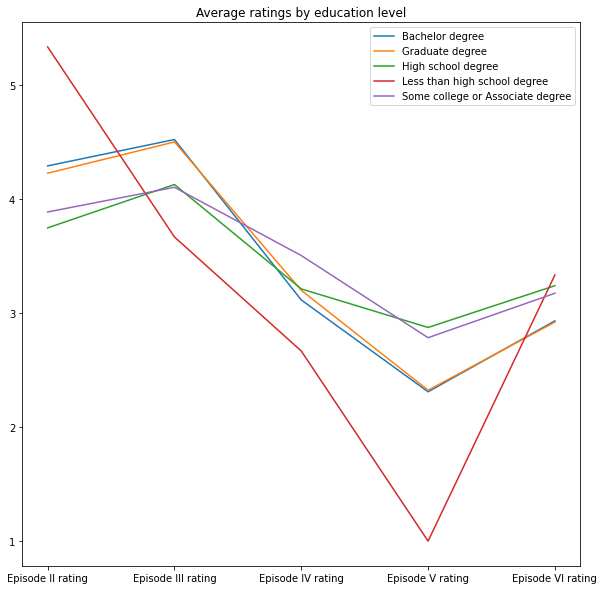

In [63]:
# plot line chart
fig, ax = plt.subplots(figsize=(10, 10))
for e in edus:
    ax.plot(edu_diff.loc[e, edu_diff.columns[8:]])
    ax.set_title('Average ratings by education level')
    ax.legend(edus)
plt.show()

The most different ratings provided the group of respondents with 'less than high school degree' education level. They clearly prefer the only one film, Episode V, followed by Episode IV.
Respondents with graduate and bachelor degrees behaved in the similar way, as well as respondents with high school degree and assosiate degree.

In [64]:
star_wars['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64